In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from moviepy.editor import VideoClip
from moviepy.video.io.bindings import mplfig_to_npimage
import os
import subprocess

In [2]:
df = pd.read_csv("data.txt")

In [3]:
df

,X,Y
0,0,1
1,1,3
2,2,7
3,3,13
4,4,21


# closed form

In [4]:
# calculate terms
sigma_y = df['Y'].sum()
sigma_x = df['X'].sum()
sigma_y_x = df.apply(lambda x: x['X']*x['Y'],axis=1).sum()
sigma_x_square = df.apply(lambda x: x['X']*x['X'],axis=1).sum()
N = df.shape[0]

In [5]:
W_1_hat = (sigma_y_x - (sigma_y*sigma_x/N))/(sigma_x_square - (sigma_x*sigma_x/N))
W_0_hat = (sigma_y/N) - W_1_hat*sigma_x/N

In [6]:
print("Intercept(W0) = ",W_0_hat," ,slope(W1) = ",W_1_hat)

Intercept(W0) =  -1.0  ,slope(W1) =  5.0


## plot

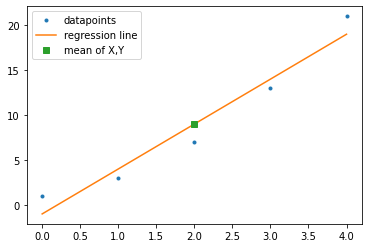

In [7]:
x_vals = np.array(df['X'])
y_vals = W_0_hat + W_1_hat * x_vals
plt.plot(list(df['X']), list(df['Y']), '.',label = "datapoints")
plt.plot(x_vals,y_vals,'-',label="regression line")
plt.plot(sigma_x/N,sigma_y/N,'s',label="mean of X,Y")
plt.legend()
plt.show()

## if means of X,Y are 0

In [27]:
df2 = pd.read_csv("special_data.txt")

In [28]:
# terms
sigma_y = df2['Y'].sum()
sigma_x = df2['X'].sum()
sigma_y_x = df2.apply(lambda x: x['X']*x['Y'],axis=1).sum()
sigma_x_square = df2.apply(lambda x: x['X']*x['X'],axis=1).sum()
N = df2.shape[0]

In [29]:
print("mean of X,Y: ",sigma_x,sigma_y)

mean of X,Y:  0 0


In [30]:
# calculating slope, intercept
W_1_hat = (sigma_y_x - (sigma_y*sigma_x/N))/(sigma_x_square - (sigma_x*sigma_x/N))
W_0_hat = (sigma_y/N) - W_1_hat*sigma_x/N

In [31]:
print("Intercept(W0) = ",W_0_hat," ,slope(W1) = ",W_1_hat)

Intercept(W0) =  0.0  ,slope(W1) =  -1.8571428571428572


## plot

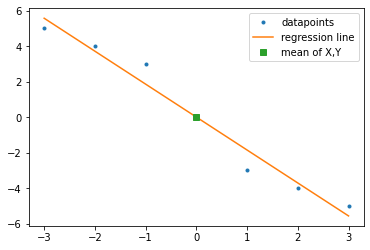

In [33]:
x_vals = np.array(df2['X'])
y_vals = W_0_hat + W_1_hat * x_vals
plt.plot(list(df2['X']), list(df2['Y']), '.',label = "datapoints")
plt.plot(x_vals,y_vals,'-',label="regression line")
plt.plot(sigma_x/N,sigma_y/N,'s',label="mean of X,Y")
plt.legend()
plt.show()

# Gradient Descent

In [8]:
w0=0
w1=0
step_size = 0.001
tolerance = 3.7416573867739414
converged = False
X = np.asarray(df['X'])
Y = np.asarray(df['Y'])
weights = [(w0,w1)]

In [9]:
while not converged:
    y_pred = w0 + w1*X
    errors = y_pred-Y
    # update intercept w1
    w0 = w0 - 2*step_size*sum(errors)
    # update slope
    w1 = w1 - 2*step_size*sum(errors*X)
    weights.append((w0,w1))
    gradient_sum_squares = sum(errors*errors)
    if(np.sqrt(gradient_sum_squares)<=tolerance):
        converged=True

In [10]:
print("final w0,w1: ",w0,w1)

final w0,w1:  -0.9999999240712735 4.999999973365641


## plot

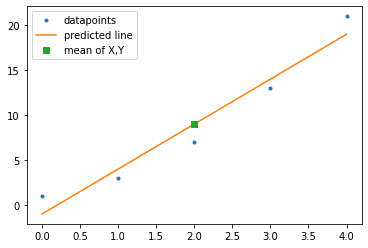

In [11]:
x_vals = np.array(df['X'])
y_vals = w0 + w1 * x_vals
plt.plot(list(df['X']), list(df['Y']), '.',label = "datapoints")
plt.plot(x_vals,y_vals,'-',label="predicted line")
plt.plot(sigma_x/N,sigma_y/N,'s',label="mean of X,Y")
plt.legend()
plt.show()

# all slopes graphs

In [15]:
def generate_graphs(weights,df):
    # folder = "imagess"
    x_vals = np.array(df['X'])
    for i in range(0,len(weights),3):
        w0,w1 = weights[i]
        y_vals = w0 + w1 * x_vals
        plt.plot(list(df['X']), list(df['Y']), '.',label = "datapoints")
        plt.plot(x_vals,y_vals,'-',label="w0="+str(w0)+" w1= "+str(w1))
        # plt.savefig(folder + "/file%02d.png" % i)
        plt.legend()
        plt.show()
        plt.clf()

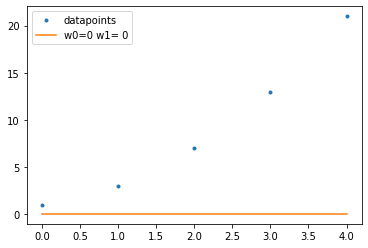

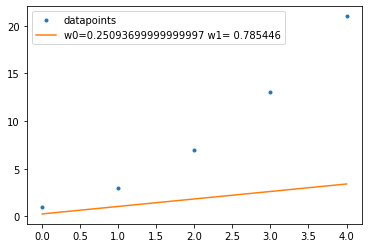

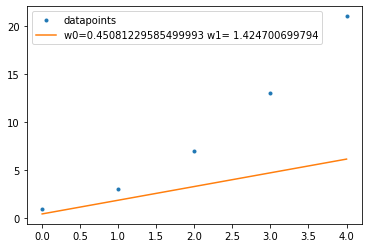

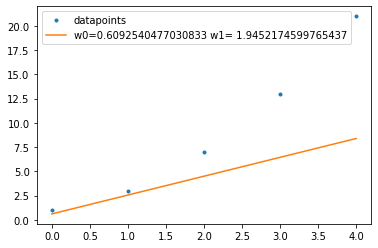

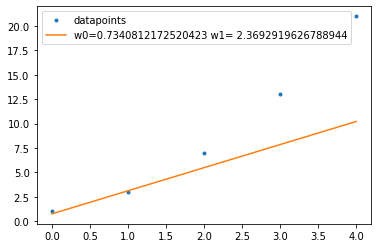

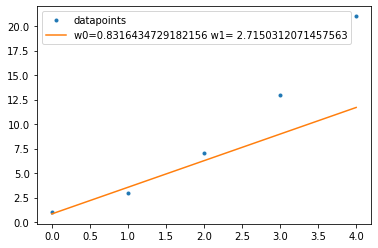

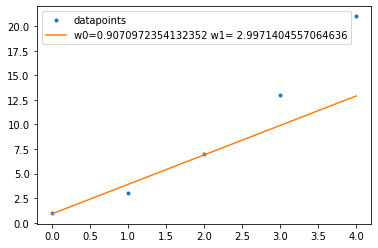

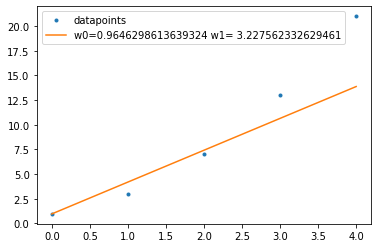

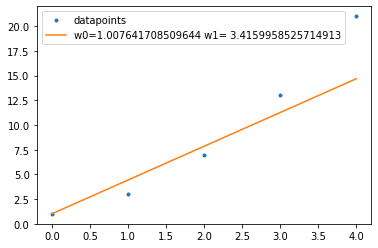

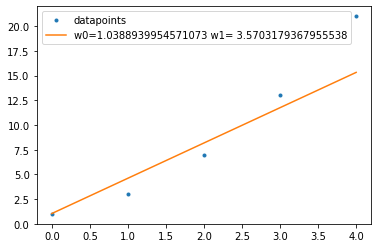

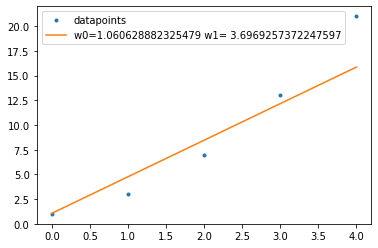

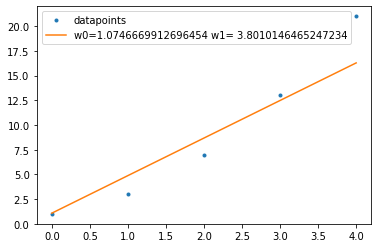

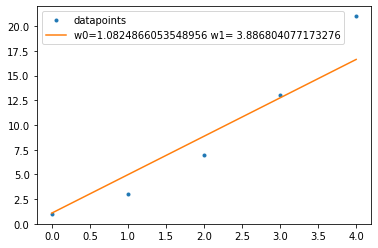

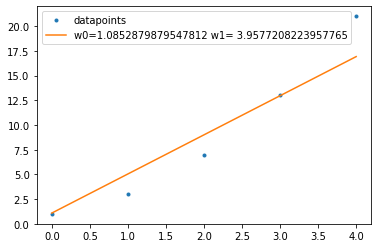

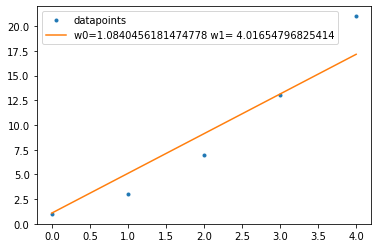

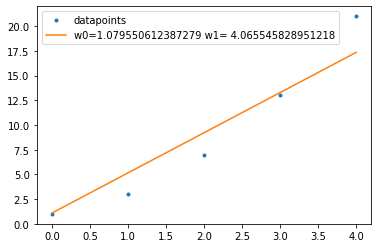

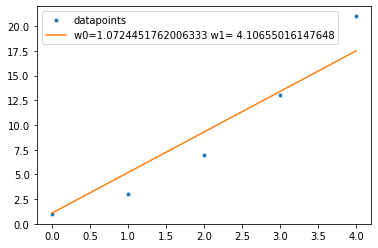

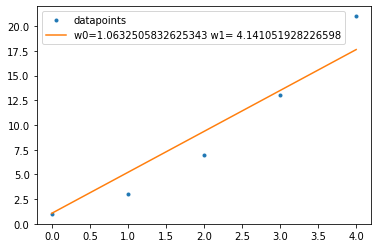

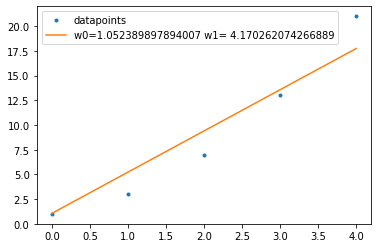

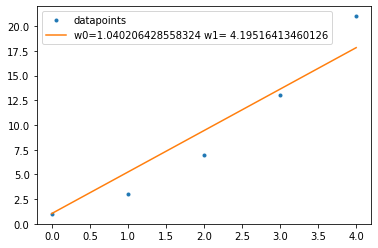

<Figure size 432x288 with 0 Axes>

In [14]:
generate_graphs(weights[:60],df)